# Modeling  
    Analyze the 6 csv files
    Identity the master tables like Employee, Department
    Identify bridge tables like Dept Manager, Dept Employee, Salaries & Titles
    Identity primary keys for master tables
    identify relationsip between bridge table and 1 or more master tables
    Create scripts for master tables first followed by bridge tables
    Save the data definition language (DDL) scripts
    Execute and create tables

# Loading data
    Load each table using csv file

# Writing queries
   Create the queries based on 1 or more tables using joins, grooup by, order by wherever applicable

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
#engine = create_engine('postgresql://localhost:63576/SQLHW')
engine = create_engine('postgresql://postgres:Password@0@localhost/SQLHW')
connection = engine.connect()


In [11]:
print(connection)
#data = pd.read_sql("SELECT title, avg(salary) as avg_salary FROM salaries s join titles t on s.emp_no=t.emp_no group by title", connection)
#data


data = pd.read_sql("select title, avg(salary)/1000 as avg_salary From salaries s join titles t on s.emp_no=t.emp_no   \
join (select max(from_date) as from_date, emp_no from titles group by emp_no) emp_title on t.emp_no = \
emp_title.emp_no and t.from_date = emp_title.from_date  group by title order by avg_salary", connection)
data.head()

,title,avg_salary
0,Senior Engineer,48.506800
1,Engineer,48.535337
2,Assistant Engineer,48.564434
3,Technique Leader,48.582426
4,Manager,49.600556


In [12]:
#my_query = 'SELECT title, salary FROM salaries s join titles t on s.emp_no=t.emp_no'
#results = connection.execute(my_query).fetchall()

In [13]:
#print(len(results))

Text(0.5,0,'Title')

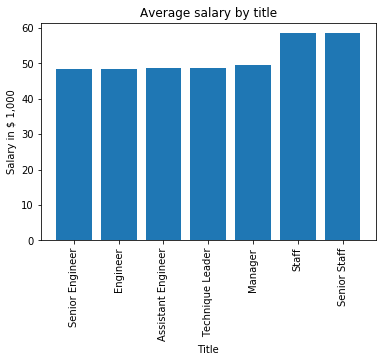

In [16]:
plt.bar(data['title'],data['avg_salary'])
plt.tick_params(axis='x', rotation=90)
plt.title("Average salary by title")
plt.ylabel("Salary in $ 1,000")
plt.xlabel("Title")